<div class="alert alert-block alert-info">
__Name__: pangenome_manifold<br/>
__Description__: Examine individual pangenome relationships using dimensionality reduction<br/>
__Author__: Matthew Whiteside matthew dot whiteside at canada dot ca<br/>
__Date__: Oct 23, 2017<br/>
__TODO__:<br/>
</div>

In [2]:
from hpsklearn import HyperoptEstimator, any_classifier, xgboost_classification, random_forest, gradient_boosting, extra_trees
from hyperopt import tpe
import numpy as np
import pandas as pd
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import matplotlib
matplotlib.rcParams['figure.figsize'] = [10.0,8.0]

WARN: OMP_NUM_THREADS=None =>
... If you are using openblas if you are using openblas set OMP_NUM_THREADS=1 or risk subprocess calls hanging indefinitely


/home/matt/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import os
os.chdir('../pangenome')
import config
import utils
import classify
pg, genome_list, locus_list = utils.read_panseq(config.PANSEQ['pangenome_file'])
amr,amr_list = utils.read_amr(config.PHENOTYPE['amr_file'], genome_list)
annot = utils.read_annot(config.ANNOTATION['blast_file'])

In [19]:
from sklearn.manifold import MDS
from sklearn.metrics.pairwise import pairwise_distances
from mpl_toolkits.mplot3d import Axes3D

In [23]:
D = pairwise_distances(pg, metric='euclidean', n_jobs=4)

In [27]:
mds =  MDS(n_components=2, random_state=22, dissimilarity='precomputed', n_jobs=4)

In [28]:
D_mds = mds.fit_transform(D)

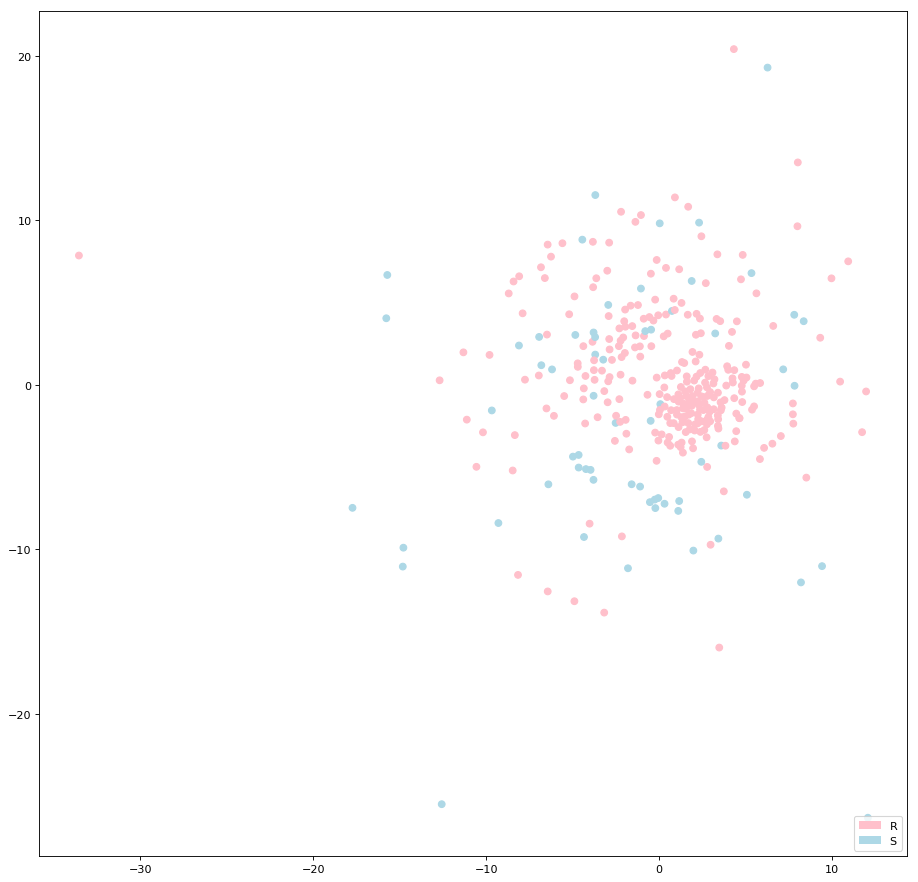

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
N = D_mds.shape[0]

# Plot
d = np.argwhere(amr_list == 'ampicillin').item(0)
validrows = ~np.isnan(amr[:,d])
y = amr[validrows,d]
fig = plt.figure(figsize=(14, 14), dpi= 80, facecolor='w', edgecolor='k')
ax = fig.add_subplot(111)
colours = np.array(['lightblue'] * N)
colours[y == 1] = 'pink'
ax.scatter(D_mds[:, 0], D_mds[:, 1], c=colours)

# Legend
classes = ['R','S']
class_colours = ['pink','lightblue']
dots = []
for i in range(0,len(class_colours)):
    dots.append(mpatches.Rectangle((0,0),1,1,fc=class_colours[i]))
plt.legend(dots,classes,loc=4)

plt.show()

In [18]:
genome_list

Index(['595_dot_68', '85569_dot_10', '85569_dot_100', '85569_dot_101',
       '85569_dot_102', '85569_dot_105', '85569_dot_106', '85569_dot_107',
       '85569_dot_108', '85569_dot_109',
       ...
       '85569_dot_90', '85569_dot_91', '85569_dot_92', '85569_dot_93',
       '85569_dot_94', '85569_dot_95', '85569_dot_96', '85569_dot_97',
       '85569_dot_98', '85569_dot_99'],
      dtype='object', length=342)